In [3]:
import librosa
import math
import scipy
import matplotlib.pyplot as plt
import wave
import numpy
import sys
from scipy.signal import lfilter, hamming
from flask import Flask, render_template, Response, send_file
from scipy.io import wavfile
import matplotlib.pyplot as plt
import io
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from os import path
from time import sleep


In [4]:
app = Flask(__name__)

@app.route('/objective')
def Objectives():
    return render_template('Objective.html')

@app.route('/procedure')
def Procedure():
    return render_template('Procedure.html')


@app.route('/experiment')
def Experiment():
    return render_template('Experiment.html')


@app.route('/observations')
def Observations():
    return render_template('Observations.html')


@app.route('/references')
def References():
    return render_template('References.html')


@app.route('/feedback')
def Feedback():
    return render_template('Feedback.html')

@app.route('/tutorial')
def Tutorial():
    return render_template('Tutorial.html')

@app.route('/assessment')
def Assesment():
    return render_template('Assessment.html')

@app.route('/windowed/<file>/<type>')
def windowed_waveform(type, file):
    sleep(2)
    if(path.exists('static/images/windowed-'+type+'-wav'+file+'.png') is False) :
        fig = create_window_plot(type, file)

    return send_file('static/images/windowed-'+type+'-wav'+file+'.png', mimetype='image/gif')

@app.route('/stft/<file>/<nfft>')
def log_spectrum(file,nfft):
    sleep(2)
    if(path.exists('static/images/stft-wav'+file+'-nfft'+nfft+'.png') is False):
        fig = create_stft(file,nfft)

    return send_file('static/images/stft-wav'+file+'-nfft'+nfft+'.png', mimetype='image/gif')




In [8]:
audioFile = "wav/ex1.wav"

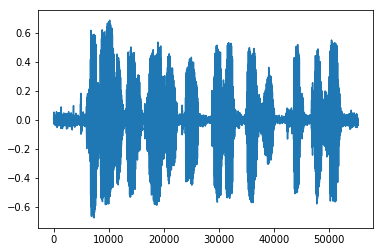

In [10]:
y, sr = librosa.load(audioFile)

plt.plot(y)


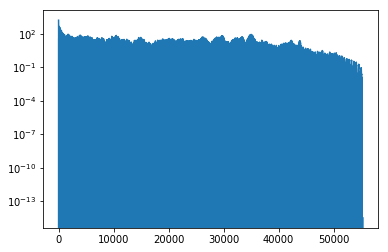

In [12]:
autoCorr = librosa.autocorrelate(y)
plt.yscale("log")
plt.plot(autoCorr)

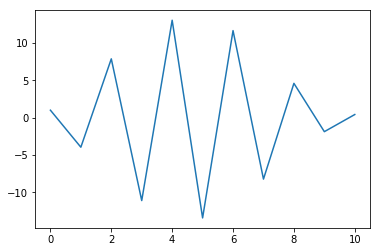

In [14]:
lpc= librosa.lpc(y,10)
plt.plot(lpc)

In [42]:
fmin = 5
fmax= 20000
i_min = sr/fmax
i_max = sr/fmin
autoCorr[:int(i_min)] = 0
autoCorr[int(i_max):] = 0
i = autoCorr.argmax()
f0 = float(sr)/i
print(f0)

259.4117647058824


In [15]:
spf = wave.open(audioFile, 'r') 
x = spf.readframes(-1)
x = numpy.fromstring(x, 'Int16')

N = len(x)
w = numpy.hamming(N)

x1 = x * w
x1 = lfilter([1], [1., 0.63], x1)

rts = numpy.roots(lpc)
rts = [r for r in rts if numpy.imag(r) >= 0]

angz = numpy.arctan2(numpy.imag(rts), numpy.real(rts))

Fs = spf.getframerate()
frqs = sorted(angz * (Fs / (2 * math.pi)))


print(frqs)

/home/shubhangi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/shubhangi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  This is separate from the ipykernel package so we can avoid doing imports until


[428.88937, 1437.3114, 2220.111, 3866.1294, 5144.9336]


In [3]:
def create_stft(file, nfft):
    file = str(file)
    audio, sample_rate = librosa.load('static/wav/audio'+file+'.wav')
    output = np.abs(librosa.stft(audio, n_fft=int(nfft)))
    output = librosa.amplitude_to_db(output)
    plt.figure(figsize=(5, 2))
    plt.plot(output)
    plt.grid(color='grey', linestyle='--', linewidth=0.5)
    plt.savefig('static/images/stft-wav'+file+'-nfft'+str(nfft)+'.png')
    plt.close()
    return plt

if __name__ == '__main__':
    type = ['rectangular','hamming','hann','cosine']

    for file in range(1,3):
        for option in type:
            create_window_plot(option,file)

    nfft_values = [64,128,256,512,1024,2048, 4096,8192]

    for file in range(1,3):
        for nfft in nfft_values:
            create_stft(file, nfft)

    app.run()

NameError: name 'create_window_plot' is not defined